In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\liche\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
buildings = gpd.read_file('valid_buildings.geojson')
streets = gpd.read_file('Highways.gpkg', layer='streets')
tessellation = gpd.read_file('valid_tess.geojson')

In [5]:
streets['nID'] = momepy.unique_id(streets)
streets

,TOID,alternateidentifier_thematicidentifier_id,identifier_codespace,identifier,beginlifespanversion,localid,namespace,innetwork_href,fictitious,endnode_href,...,alternatename,alternatename_lang,roadname_lang,cyclefacility_codespace,cyclefacility,wholelink,roadstructure_codespace,roadstructure,geometry,nID
0,osgb4000000030459744,{5900_5373670178983},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030459744,2017-04-15T00:00:00.000,4000000030459744,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029974705,...,None,None,None,None,None,None,None,None,"LINESTRING (537367.000 178990.000, 537366.062 ...",0
1,osgb4000000031090578,{5900_5378740179166},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000031090578,2020-03-21T00:00:00.000,4000000031090578,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000031089813,...,None,None,None,None,None,None,None,None,"LINESTRING (537888.598 179164.233, 537887.199 ...",1
2,osgb4000000030348641,{5900_5382930179066},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030348641,2017-04-15T00:00:00.000,4000000030348641,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029974999,...,None,None,None,None,None,None,None,None,"LINESTRING (538303.000 179072.000, 538297.000 ...",2
3,osgb4000000031232452,{5900_5386170179050},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000031232452,2017-04-15T00:00:00.000,4000000031232452,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029982630,...,None,None,None,None,None,None,None,None,"LINESTRING (538581.994 178991.361, 538568.000 ...",3
4,osgb5000005285209422,None,http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/5000005285209422,2021-09-18T00:00:00.000,5000005285209422,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000030612434,...,None,None,None,None,None,None,None,None,"LINESTRING (538358.559 179284.788, 538356.262 ...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579,osgb4000000030420349,{5900_5370400181558},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030420349,2023-04-23T00:00:00.000,4000000030420349,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029976906,...,None,None,None,None,None,None,None,None,"LINESTRING (536966.000 181528.000, 536958.000 ...",11579
11580,osgb4000000030420517,None,http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030420517,2023-04-01T00:00:00.000,4000000030420517,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029977561,...,None,None,None,None,None,None,None,None,"LINESTRING (536898.770 182585.651, 536901.268 ...",11580
11581,osgb4000000030475632,{5900_5369300181065},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030475632,2023-04-23T00:00:00.000,4000000030475632,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029976854,...,None,None,None,None,None,None,None,None,"LINESTRING (536931.000 181068.000, 536930.000 ...",11581
11582,osgb4000000030475637,"{5900_5369350181513,5900_5370400181558}",http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030475637,2023-04-23T00:00:00.000,4000000030475637,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029976906,...,None,None,None,None,None,None,None,None,"LINESTRING (536936.000 181511.000, 536935.000 ...",11582


In [7]:
buildings['nID'] = momepy.get_network_id(buildings, streets, 'nID', min_size=100)

<ipython-input-7-561e1690dbf5>:1: UserWarning: Some objects were not attached to the network. Set larger `min_size``. 17 affected elements.
  buildings['nID'] = momepy.get_network_id(buildings, streets, 'nID', min_size=100)


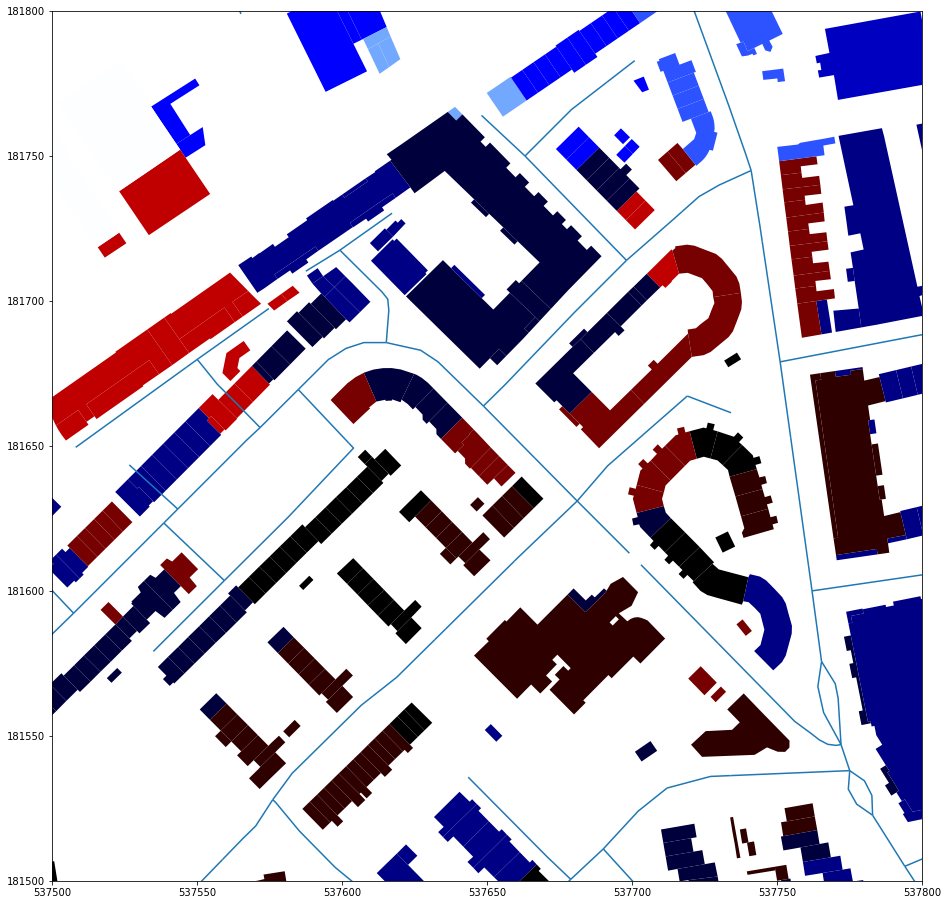

In [12]:
f, ax = plt.subplots(figsize=(16, 16))
buildings.plot(ax=ax, column='nID', categorical=True, cmap='flag')
streets.plot(ax=ax)
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [13]:
graph = momepy.gdf_to_nx(streets)

In [14]:
nodes, edges = momepy.nx_to_gdf(graph)

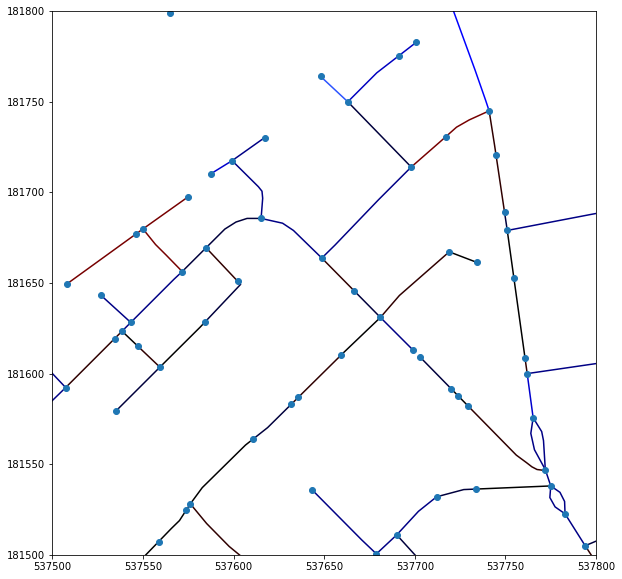

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, column='nID', categorical=True, cmap='flag')
nodes.plot(ax=ax, zorder=2)
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [18]:
nodes.head()

,nodeID,geometry
0,0,POINT (537367.000 178990.000)
1,1,POINT (537366.062 178974.998)
2,2,POINT (537888.598 179164.233)
3,3,POINT (537887.199 179140.394)
4,4,POINT (538303.000 179072.000)


In [19]:
edges.head()

,TOID,alternateidentifier_thematicidentifier_id,identifier_codespace,identifier,beginlifespanversion,localid,namespace,innetwork_href,fictitious,endnode_href,...,cyclefacility_codespace,cyclefacility,wholelink,roadstructure_codespace,roadstructure,geometry,nID,mm_len,node_start,node_end
0,osgb4000000030459744,{5900_5373670178983},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030459744,2017-04-15T00:00:00.000,4000000030459744,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029974705,...,None,None,None,None,None,"LINESTRING (537367.000 178990.000, 537366.062 ...",0,15.031296,0,1
1,osgb4000000030419861,{5900_5373730178990},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000030419861,2017-04-15T00:00:00.000,4000000030419861,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000029974704,...,None,None,None,None,None,"LINESTRING (537367.000 178990.000, 537377.808 ...",31,10.835394,0,54
2,osgb5000005309345341,{5900_5373240178993},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/5000005309345341,2023-03-01T00:00:00.000,5000005309345341,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000065566463,...,None,None,None,None,None,"LINESTRING (537367.000 178990.000, 537355.000 ...",2031,14.485382,0,2177
3,osgb4000000031090578,{5900_5378740179166},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000031090578,2020-03-21T00:00:00.000,4000000031090578,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000031089813,...,None,None,None,None,None,"LINESTRING (537888.598 179164.233, 537887.199 ...",1,23.880015,2,3
4,osgb4000000031090623,{5900_5378740179166},http://inspire.jrc.ec.europa.eu/ids,http://data.os.uk/id/4000000031090623,2017-04-15T00:00:00.000,4000000031090623,http://data.os.uk/,#OSHighwayNetwork,False,osgb4000000031089814,...,None,None,None,None,None,"LINESTRING (537888.598 179164.233, 537899.505 ...",41,10.922357,2,67


In [20]:
buildings['nodeID'] = momepy.get_node_id(buildings, nodes, edges,
                                         'nodeID', 'nID')

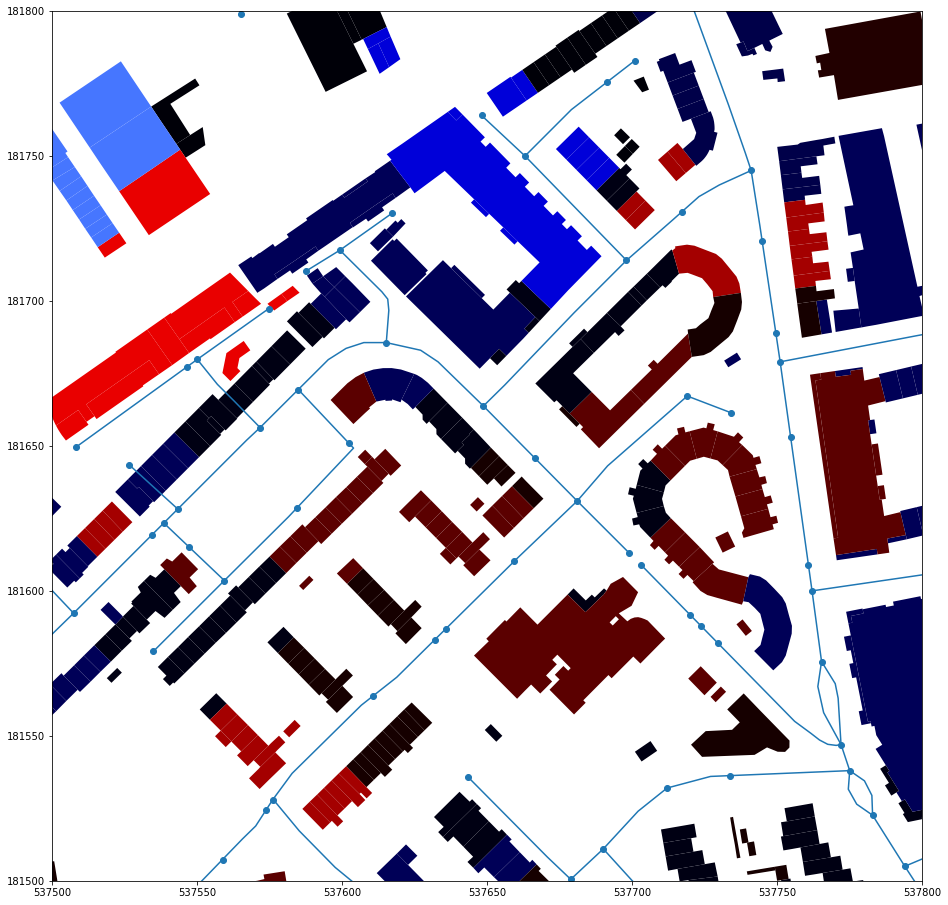

In [21]:
f, ax = plt.subplots(figsize=(16, 16))
buildings.plot(ax=ax, column='nodeID', categorical=True, cmap='flag')
nodes.plot(ax=ax, zorder=2)
edges.plot(ax=ax, zorder=1)
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [22]:
buildings.columns

Index(['OBJECTID', 'fid', 'featurecod', 'version', 'versiondat', 'theme',
       'calculated', 'changedate', 'reasonforc', 'descriptiv', 'descript_1',
       'make', 'physicalle', 'physicalpr', 'poly_broke', 'OBJECTID_2',
       'os_topo_to', 'os_topo_ve', 'bha_proces', 'tileref', 'abshmin', 'absh2',
       'abshmax', 'relh2', 'relhmax', 'bha_conf', 'layer', 'path',
       'TotalEnergyConsumptionCurrent_sum',
       'TotalEnergyConsumptionPotential_sum', 'TotalFloorArea_sum', 'uID',
       'geometry', 'nID', 'nodeID'],
      dtype='object')

In [23]:
tessellation.head()

,uID,eID,geometry
0,29287.0,1,"POLYGON ((538266.734 179071.710, 538266.591 17..."
1,29286.0,1,"POLYGON ((538273.382 179073.651, 538273.377 17..."
2,6661.0,1,"POLYGON ((538294.656 179086.577, 538294.482 17..."
3,29277.0,1,"POLYGON ((538283.540 179080.530, 538283.198 17..."
4,29288.0,1,"POLYGON ((538270.682 179080.510, 538270.681 17..."


In [24]:
columns = ['uID', 'nID', 'nodeID']
tessellation = tessellation.merge(buildings[columns], on='uID')
tessellation.head()

,uID,eID,geometry,nID,nodeID
0,29287.0,1,"POLYGON ((538266.734 179071.710, 538266.591 17...",37.0,5.0
1,29286.0,1,"POLYGON ((538273.382 179073.651, 538273.377 17...",37.0,5.0
2,6661.0,1,"POLYGON ((538294.656 179086.577, 538294.482 17...",37.0,11.0
3,29277.0,1,"POLYGON ((538283.540 179080.530, 538283.198 17...",6.0,4.0
4,29288.0,1,"POLYGON ((538270.682 179080.510, 538270.681 17...",37.0,5.0


In [25]:
buildings.to_file('buildings_extracted_linked.geojson', driver='GeoJSON')
streets.to_file('streets_linked.geojson', driver='GeoJSON')
nodes.to_file('nodes_linked.geojson', driver='GeoJSON')
edges.to_file('edges_linked.geojson', driver='GeoJSON')
tessellation.to_file('enclosed_tess_simple_linked.geojson', driver='GeoJSON')